**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**DATAFRAME**

In [ ]:
heart=pd.read_csv('heart.csv')
df=pd.DataFrame(heart)
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


**No. OF NULL VALUES BEFORE DATA CLEANING**

In [ ]:
NaN_count=df.isna().sum()
print(NaN_count)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


**DATA CLEANING AND FILLING**

In [ ]:
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)
NaN_count=df.isna().sum()
print(NaN_count)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


<ipython-input-131-ef1f652fbbb1>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-131-ef1f652fbbb1>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


**GRAPHICAL REPRESENTATION**

<Axes: xlabel='sex', ylabel='target'>

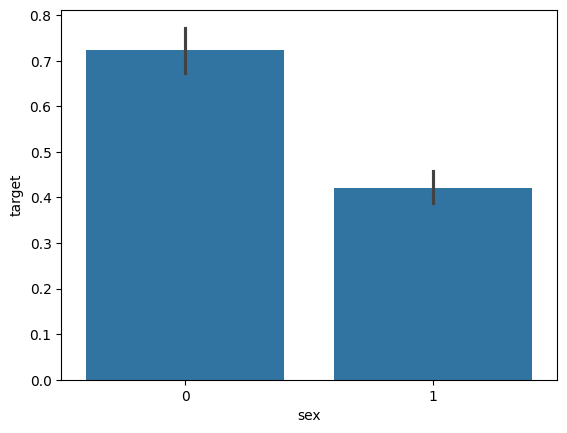

In [ ]:
sns.barplot(x='sex',y='target',data=df)

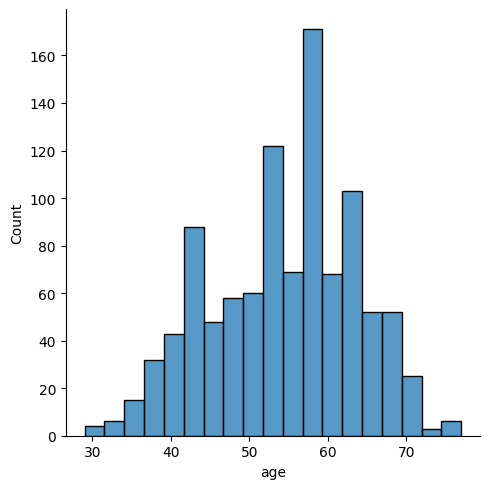

In [ ]:
sns.displot(df['age'])
plt.show()

**SPLITTING DATA**

In [ ]:
from sklearn.model_selection import train_test_split
predictors=df.drop("target",axis=1)
target=df['target']
X_train , X_test , Y_train , Y_test = train_test_split(predictors,target,test_size=0.20)

**IMPORTING ALGORITHMS**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

**DECISION TREE**

In [ ]:
classifier= DecisionTreeClassifier() #instance
classifier.fit(X_train,Y_train) #fit does training of dataset
Y_pred=classifier.predict(X_test) #does the prediction
score=round(accuracy_score(Y_pred,Y_test)*100,2) #accuracy upto two decimal points
print("Accuracy = ",str(score),"%") #prints accuracy

Accuracy =  100.0 %


**LOGISTIC REGRESSION**

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)
score=round(accuracy_score(Y_pred,Y_test)*100,2)
print("Accuracy = ",str(score),"%")

Accuracy =  85.85 %


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**RANDOM FOREST**

In [ ]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
Y_pred=rfc.predict(X_test)
score=round(accuracy_score(Y_pred,Y_test)*100,2)
print("Accuracy = ",str(score),"%")

Accuracy =  98.54 %


**GRADIENT DECENT**

In [ ]:
X = df.drop(columns='target')
y = df['target']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X = np.c_[np.ones(X.shape[0]), X]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = (1 / m) * X.T.dot(errors)
        theta -= learning_rate * gradients
    return theta

theta = np.zeros(X_train.shape[1])
learning_rate = 0.01
iterations = 1000

y_train = y_train.values

theta_optimized = gradient_descent(X_train, y_train, theta, learning_rate, iterations)

def predict(X, theta):
    predictions = X.dot(theta)
    return (predictions >= 0.5).astype(int)

y_pred = predict(X_test, theta_optimized)

accuracy = np.mean(y_pred == y_test) * 100

print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 81.95%
